# Week 3 Check-In
## Team Spotiflies: Joanna, Aaron, Aubrey, Kennedy, Aster, Ethan
GitHub Link: https://github.com/ketexon/csm148-spotiflies 

In [5]:
%pip install pandas numpy matplotlib seaborn scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 30.4 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 27.4 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


### Reading in the Data
We used the cleaned version of our dataset from the week 2 check in.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

# Reading in the cleaned data from previous week check in
spotify = pd.read_csv("csv_outputs/cleaned_spotify.csv")
numeric_spotify = spotify.select_dtypes(include=[np.number])
numeric_spotify = numeric_spotify.loc[:, ~numeric_spotify.columns.isin(["mode", "key", "time_signature"])]
numeric_spotify

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,73,230666,0.676,0.4610,-6.746,0.1430,0.0322,0.000001,0.3580,0.7150,87.917
1,55,149610,0.420,0.1660,-17.235,0.0763,0.9240,0.000006,0.1010,0.2670,77.489
2,57,210826,0.438,0.3590,-9.734,0.0557,0.2100,0.000000,0.1170,0.1200,76.332
3,71,201933,0.266,0.0596,-18.515,0.0363,0.9050,0.000071,0.1320,0.1430,181.740
4,82,198853,0.618,0.4430,-9.681,0.0526,0.4690,0.000000,0.0829,0.1670,119.949
...,...,...,...,...,...,...,...,...,...,...,...
113994,21,384999,0.172,0.2350,-16.393,0.0422,0.6400,0.928000,0.0863,0.0339,125.995
113995,22,385000,0.174,0.1170,-18.318,0.0401,0.9940,0.976000,0.1050,0.0350,85.239
113996,22,271466,0.629,0.3290,-10.895,0.0420,0.8670,0.000000,0.0839,0.7430,132.378
113997,41,283893,0.587,0.5060,-10.889,0.0297,0.3810,0.000000,0.2700,0.4130,135.960


### Regression

Let's use the `popularity` variable as our response variable, as an accurate analysis of this variable can be useful for predicting the performance of upcoming songs in the real world.

Let's compare this against the `energy` variable for our predictor, as the relationship between the energy level of a song and its subsequent popularity is always something we've been curious about.

In [ ]:
# Making scatterplots for each variable vs popularity 
# correlated_features = [
#     ("energy", "popularity"),
# ]
# for (i, j) in correlated_features:
#     plt.plot(np.unique(numeric_spotify[i]), np.poly1d(np.polyfit(numeric_spotify[i], numeric_spotify[j], 1))(np.unique(numeric_spotify[i])), color='red')
#     plt.plot(np.unique(numeric_spotify[i]), np.poly1d(np.polyfit(numeric_spotify[i], numeric_spotify[j], 2))(np.unique(numeric_spotify[i])), color='orange')
#     plt.scatter(numeric_spotify[i], numeric_spotify[j], s=5)
#     plt.xlabel(i)
#     plt.ylabel(j)
#     plt.show()

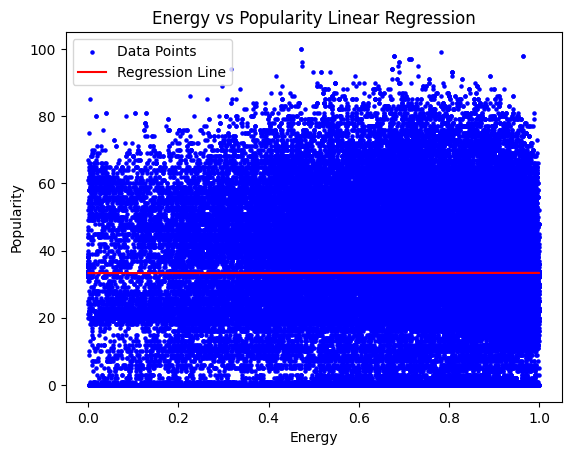

In [31]:
# Modeling regression of energy versus popularity
# We are doing a linear and quadratic regression analysis.

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

random_seed = 42

# Splitting the data
# First split: separate out 20% for the test set
spotify_train_val, spotify_test = train_test_split(spotify, test_size=0.2, random_state=random_seed)

# Second split: separate remaining 80% into 60% training and 20% validation
spotify_train, spotify_val = train_test_split(spotify_train_val, test_size=0.25, random_state=random_seed)  # 0.25 * 0.8 = 0.2

# Reshape the data to fit the model
X = np.array(spotify_train['energy']).reshape(-1, 1)    # Independent variable: energy
y = np.array(spotify_train['popularity'])               # Dependent variable: popularity

# Initialize and fit the Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X, y)

# Predict values of y based on the model
y_pred = linear_reg.predict(X)

# Plotting the scatter plot of the original data
plt.scatter(spotify_train['energy'], spotify_train['popularity'], color='blue', s=5, label="Data Points")

# Plotting the regression line
plt.plot(spotify_train['energy'], y_pred, color='red', label="Regression Line")

# Adding labels and title
plt.xlabel('Energy')
plt.ylabel('Popularity')
plt.title('Energy vs Popularity Linear Regression')
plt.legend()

# Show the plot
plt.show()

### Evaluation Metrics

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculating Evaluation Metrics:
X_val = np.array(spotify_val['energy']).reshape(-1, 1)
y_val = np.array(spotify_val['popularity'])
y_val_pred = linear_reg.predict(X_val) # Predict on validation set

# Calculate metrics for the training set
train_mse = mean_squared_error(y, y_pred) # Mean squared error
train_rmse = np.sqrt(train_mse) # Root mean squared error
train_mae = mean_absolute_error(y, y_pred) # Mean average error
train_mad = np.mean(np.abs(y - y_pred))  # Mean absolute deviation
train_r2 = r2_score(y, y_pred) # R^2 (coefficient of determination)

# Calculate metrics for the validation set
val_mse = mean_squared_error(y_val, y_val_pred)
val_rmse = np.sqrt(val_mse)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_mad = np.mean(np.abs(y_val - y_val_pred)) 
val_r2 = r2_score(y_val, y_val_pred)

# Print Results:
print(f"Training MSE: {train_mse}, rMSE: {train_rmse}, MAE: {train_mae}, MAD: {train_mad}, R²: {train_r2}")
print(f"Validation MSE: {val_mse}, rMSE: {val_rmse}, MAE: {val_mae}, MAD: {val_mad}, R²: {val_r2}")


Training MSE: 497.32093686451566, rMSE: 22.300693640882916, MAE: 18.869289841687028, MAD: 18.869289841687028, R²: 1.1115933795657895e-07
Validation MSE: 499.41150485001407, rMSE: 22.347516749071115, MAE: 18.926440804898125, MAD: 18.926440804898125, R²: -7.885217162773017e-06


Based on the evaluation metrics we calculated above, our model is likely to be **underfitting** the data. 

Most notably, the MSE is very high for both the training and validation sets, 497.32 and 499.41 respectively. This may suggest that the model doesn't fit the data very well and cannot capture underlying patterns in the data.

Similarly, the R^2 values (1.11e-07 and -7.89e-06) are close to zero, which indicates that the model is explaining almost none of the variance in the dependent variable (popularity). 

### Regularization

In [ ]:
# code goes here

## Archive
### Instrumentalness VS Popularity

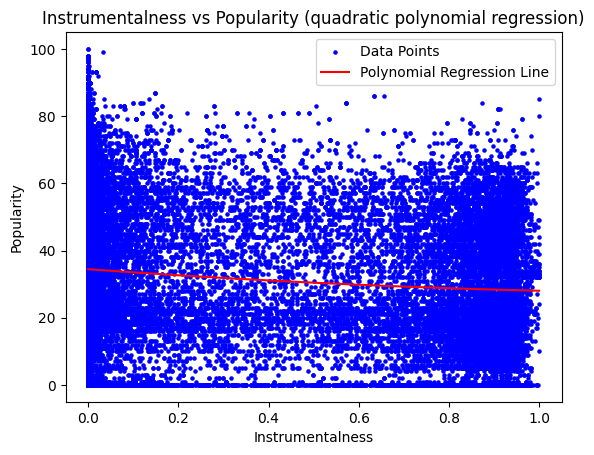

In [33]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

random_seed = 42

# Splitting the data
# First split: separate out 20% for the test set
spotify_train_val, spotify_test = train_test_split(spotify, test_size=0.2, random_state=random_seed)

# Second split: separate remaining 80% into 60% training and 20% validation
spotify_train, spotify_val = train_test_split(spotify_train_val, test_size=0.25, random_state=random_seed)  # 0.25 * 0.8 = 0.2

# Reshape the data to fit the model
X = np.array(spotify_train['instrumentalness']).reshape(-1, 1)  # Independent variable: instrumentalness
y = np.array(spotify_train['popularity'])                       # Dependent variable: popularity

# Perform Polynomial Regression (degree 2 for quadratic)
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

# Initialize and fit the Linear Regression model on polynomial features
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

# Predict values of y based on the polynomial model
y_poly_pred = poly_reg.predict(X_poly)

# Plotting the scatter plot of the original data
plt.scatter(spotify_train['instrumentalness'], spotify_train['popularity'], color='blue', s=5, label="Data Points")

# Sorting the values for a smoother polynomial curve
sorted_zip = sorted(zip(spotify_train['instrumentalness'], y_poly_pred))
X_sorted, y_poly_sorted = zip(*sorted_zip)

# Plotting the polynomial regression curve
plt.plot(X_sorted, y_poly_sorted, color='red', label="Polynomial Regression Line")

# Adding labels and title
plt.xlabel('Instrumentalness')
plt.ylabel('Popularity')
plt.title('Instrumentalness vs Popularity (quadratic polynomial regression)')
plt.legend()

# Show the plot
plt.show()


In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculating Evaluation Metrics:
X_val = np.array(spotify_val['energy']).reshape(-1, 1)
y_val = np.array(spotify_val['popularity'])
y_val_pred = linear_reg.predict(X_val) # Predict on validation set

# Calculate metrics for the training set
train_mse = mean_squared_error(y, y_pred) # Mean squared error
train_rmse = np.sqrt(train_mse) # Root mean squared error
train_mae = mean_absolute_error(y, y_pred) # Mean average error
train_mad = np.mean(np.abs(y - y_pred))  # Mean absolute deviation
train_r2 = r2_score(y, y_pred) # R^2 (coefficient of determination)

# Calculate metrics for the validation set
val_mse = mean_squared_error(y_val, y_val_pred)
val_rmse = np.sqrt(val_mse)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_mad = np.mean(np.abs(y_val - y_val_pred)) 
val_r2 = r2_score(y_val, y_val_pred)

# Print Results:
print(f"Training MSE: {train_mse}, rMSE: {train_rmse}, MAE: {train_mae}, MAD: {train_mad}, R²: {train_r2}")
print(f"Validation MSE: {val_mse}, rMSE: {val_rmse}, MAE: {val_mae}, MAD: {val_mad}, R²: {val_r2}")


Training MSE: 492.72956536194016, rMSE: 22.197512594025937, MAE: 18.694472462306898, MAD: 18.694472462306898, R²: 0.009232320487079337
Validation MSE: 512.9681562474028, rMSE: 22.64880032689155, MAE: 19.173560902135343, MAD: 19.173560902135343, R²: -0.02715335175702638
